# Galaxy vs quasars

We're now going to classify galaxy vs quasars in the Sloan Digital Sky Survey. 
The dataset is at `solutions/galaxyquasar.csv`. I have extracted it from the SDSS database using the SQL query reported [here](https://www.astroml.org/_modules/astroML/datasets/sdss_galaxy_colors.html#fetch_sdss_galaxy_colors))

- First, read the datafile.
- Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 
- Classify the dataset against the target label.
- Try some of the classification methods we've seen so far and evaluate the performance using the ROC curve.
- Remember to split the dataset into training and validation...

---
> 

---

We are in a **Generative classification method**.
Let's consider:

- x = data -- data=['ug', 'gr', 'ri', 'iz']
- y = Quasar or Galaxy. -- y={'Quasar,'Galaxy}

In order to know something about the theory of this '*color*':
> https://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp

In [1]:
import numpy as np
import pylab as plt

In [2]:
# Here, we import the data in order to get 'names'
data_0 = np.genfromtxt('../solutions/galaxyquasar.csv',delimiter=',',names =True, usecols = (0,1,2,3,4,6),dtype=float)

#Let's take our target(label)
names = data_0.dtype.names
print(names)

('u', 'g', 'r', 'i', 'z', 'z1')


In [3]:
#Here, we import the data in the right form.
# 'usecols' allowd us to cancel out the column that i want
data = np.genfromtxt('../solutions/galaxyquasar.csv',delimiter=',', usecols = (0,1,2,3,4,6),dtype=float,skip_header=1)

In [4]:
print(data)

[[18.97213    18.53676    18.5828     18.34936    18.29215     0.5228189 ]
 [19.24592    17.47646    16.47817    16.04472    15.68851     0.1228459 ]
 [19.43536    17.70268    16.91565    16.58327    16.39128     0.        ]
 ...
 [18.62718    17.30876    16.87371    16.62399    16.42296     0.05442934]
 [19.5514     18.27711    17.62101    17.21947    17.03347     0.1125709 ]
 [18.80772    17.75751    17.405      17.2165     17.12295     0.04365238]]


In [5]:
print(names)

('u', 'g', 'r', 'i', 'z', 'z1')


In [6]:
lab = np.genfromtxt('../solutions/galaxyquasar.csv',delimiter=',', usecols = (5),dtype=str,skip_header=1)
#gq = set(GQ)

y = []

for gq in lab:
    if gq == 'QSO':
        y.append(1)
    else:
        y.append(0)
#print(y)

In [7]:
print(lab)

['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


In [8]:
d = dict(zip(names,data.T))
#print(d)

In [9]:
for diff in ['ug', 'gr', 'ri', 'iz']:
    d[diff]=d[diff[0]]-d[diff[1]] 
d['lab']=lab

In [10]:
d.keys()
print(len(d['ug']))

50000


**Corner plot**

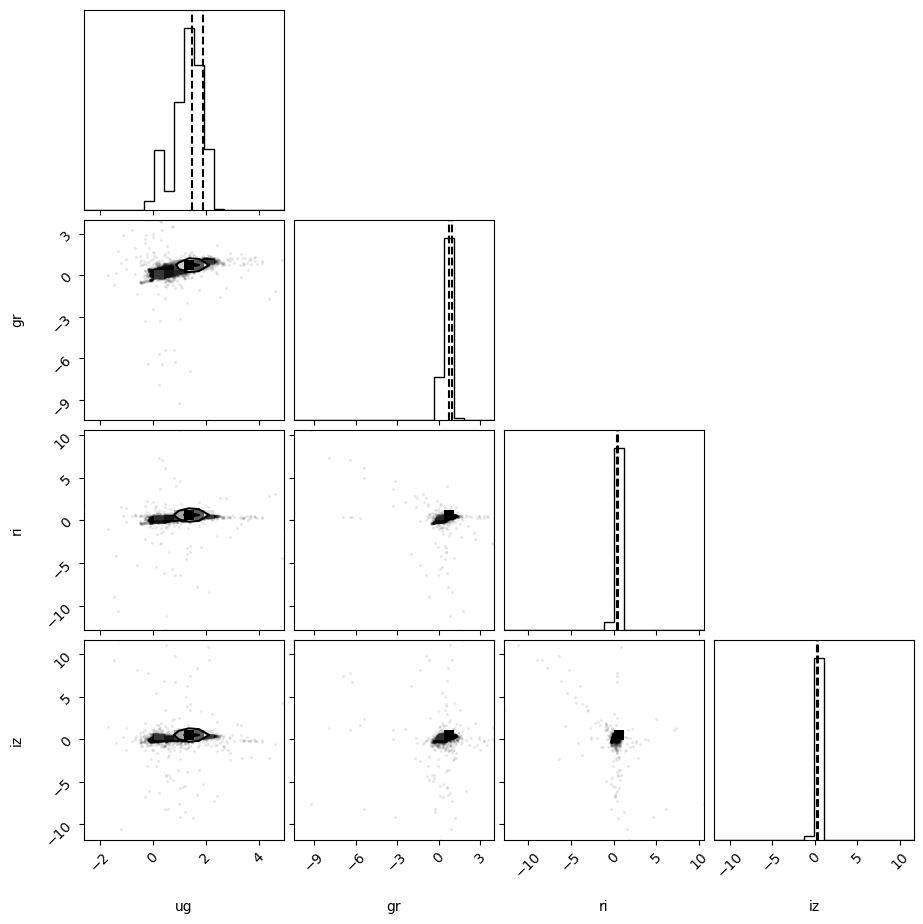

In [11]:
import corner

color = ['ug', 'gr', 'ri', 'iz']

figure = corner.corner(np.array([d['ug'],d['gr'],d['ri'],d['iz']]).T,labels = color,quantiles=[0.60,0.87]);

**Probability distribution**

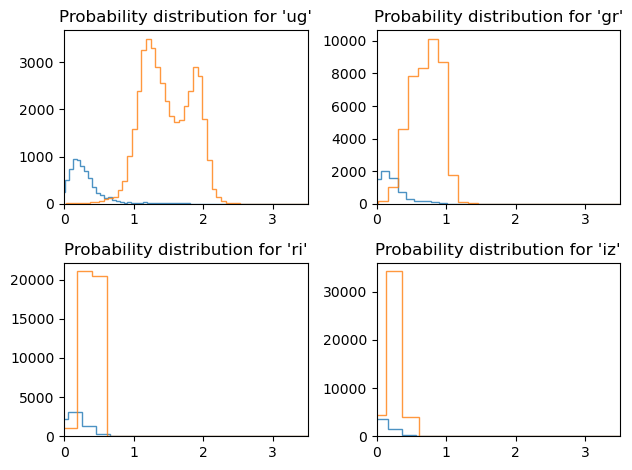

In [12]:
fig,ax = plt.subplots(2,2)

# Probability distribution for 'ug'
n1, bins1, _ = ax[0,0].hist(d['ug'][lab=='QSO'],histtype='step', bins=100, alpha=0.8);
n2, bins2, _ = ax[0,0].hist(d['ug'][lab=='GALAXY'],histtype='step', bins=100, alpha=0.8);
ax[0,0].set_title("Probability distribution for 'ug'")
ax[0,0].set_xlim(0,3.5)


#Probability distribution for 'gr'
ax[0,1].hist(d['gr'][lab=='QSO'],histtype='step', bins=100, alpha=0.8);
ax[0,1].hist(d['gr'][lab=='GALAXY'],histtype='step', bins=100, alpha=0.8);
ax[0,1].set_title("Probability distribution for 'gr'")
ax[0,1].set_xlim(0,3.5)

#Probability distribution for 'ri'
ax[1,0].hist(d['ri'][lab=='QSO' ],histtype='step', bins=100, alpha=0.8);
ax[1,0].hist(d['ri'][lab=='GALAXY'],histtype='step', bins=100, alpha=0.8);
ax[1,0].set_title("Probability distribution for 'ri'")
ax[1,0].set_xlim(0,3.5)

#Probability distribution for 'iz'
ax[1,1].hist(d['iz'][lab=='QSO' ],histtype='step', bins=100, alpha=0.8);
ax[1,1].hist(d['iz'][lab=='GALAXY'],histtype='step', bins=100, alpha=0.8);
ax[1,1].set_title("Probability distribution for 'iz'")
ax[1,1].set_xlim(0,3.5)

fig.tight_layout()

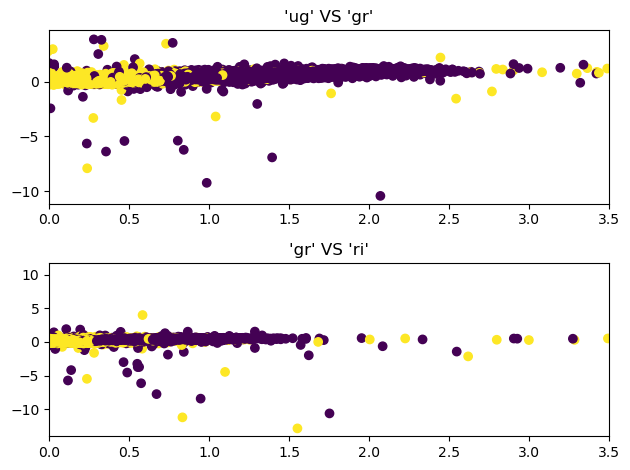

In [13]:
fig,ax = plt.subplots(2,1)

ax[0].scatter(np.array(d['ug']),np.array(d['gr']),c = y);
ax[0].set_title("'ug' VS 'gr'")
ax[0].set_xlim(0,3.5)


#Probability distribution for 'gr'
ax[1].scatter(np.array(d['gr']),np.array(d['ri']),c = y);
ax[1].set_title("'gr' VS 'ri'")
ax[1].set_xlim(0,3.5)

fig.tight_layout()

**Gaussian Naive Bayes**

*Which of the methods is best?*

(30000, 1)
(30000, 2)
(30000, 3)
(30000, 4)


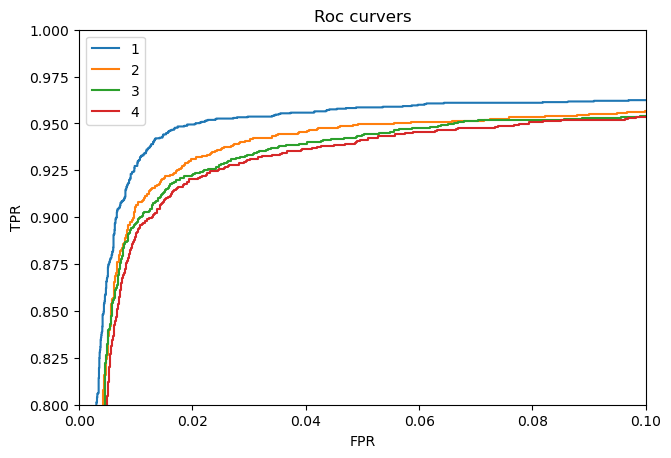

In [14]:
import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from astroML.utils import completeness_contamination

X=np.array([d['ug'], d['gr'], d['ri'], d['iz']]).T
y = np.array(lab=='QSO',dtype=int)

#color = ['ug', 'gr', 'ri', 'iz']


fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

ax1 = plt.subplot(121)

# perform Naive Bayes
predictions = []

clf = GaussianNB()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.40, random_state=0)

for i in range(4):
    print(X_train[:,0:i+1].shape)
    
    clf.fit(X_train[:,0:i+1], y_train)
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1]

    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    ax1.plot(fpr, tpr,label=str(i+1))

ax1.set_title("Roc curvers")
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax1.set_xlim(0,0.10)
ax1.set_ylim(0.8,1.0)
ax1.legend()


**Linear Discriminant Analysis**

(30000, 1)
(30000, 2)
(30000, 3)
(30000, 4)


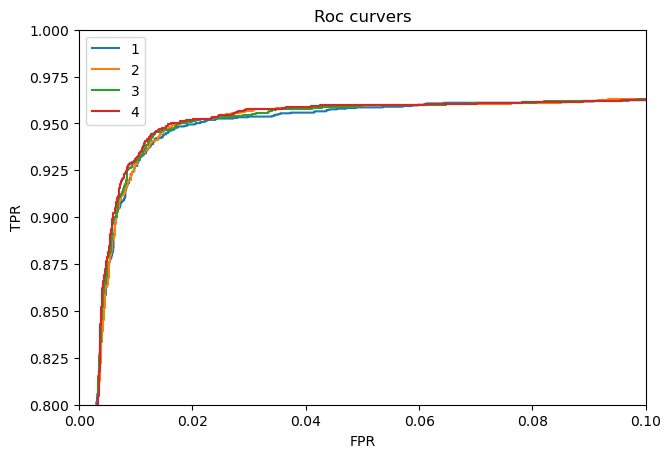

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()

fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

ax1 = plt.subplot(121)

for i in range(4):
    print(X_train[:,0:i+1].shape)
    
    lda.fit(X_train[:,0:i+1],y_train)
    y_prob = lda.predict_proba(X_test[:,0:i+1]) [:,1]

    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    ax1.plot(fpr, tpr,label=str(i+1))
    
ax1.set_title("Roc curvers")
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax1.set_xlim(0,0.10)
ax1.set_ylim(0.8,1.0)
ax1.legend()

**Quadratic Discriminant Analysis**

(30000, 1)
(30000, 2)
(30000, 3)
(30000, 4)


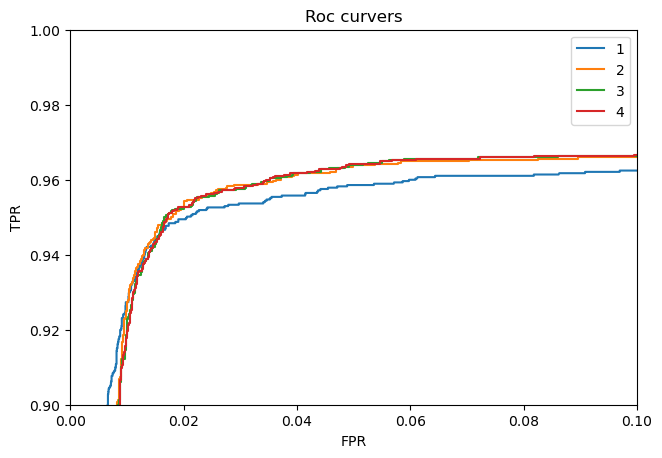

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

ax1 = plt.subplot(121)

for i in range(4):
    
    print(X_train[:,0:i+1].shape)
    qda.fit(X_train[:,0:i+1],y_train)
    y_prob = qda.predict_proba(X_test[:,0:i+1]) [:,1]

    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    ax1.plot(fpr, tpr, label=str(i+1))
    
ax1.set_title("Roc curvers")
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax1.set_xlim(0,0.10)
ax1.set_ylim(0.9,1.0)
ax1.legend()

**GMMBayes**

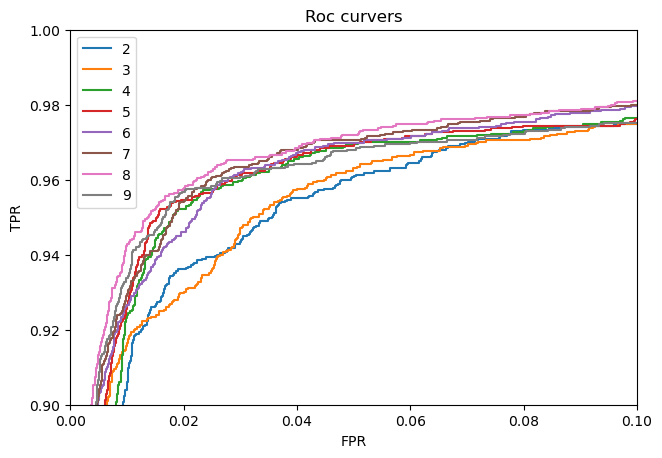

In [17]:
from astroML.classification import GMMBayes

fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

ax1 = plt.subplot(121)

for N in np.arange(2,10):
    
    clf = GMMBayes(n_components=N)
    clf.fit(X_train[:,0:4],y_train)
    y_prob = clf.predict_proba(X_test[:,0:4]) [:,1]

    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    ax1.plot(fpr, tpr, label=str(N))
    
ax1.set_title("Roc curvers")
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax1.set_xlim(0,0.10)
ax1.set_ylim(0.9,1.0)
ax1.legend()

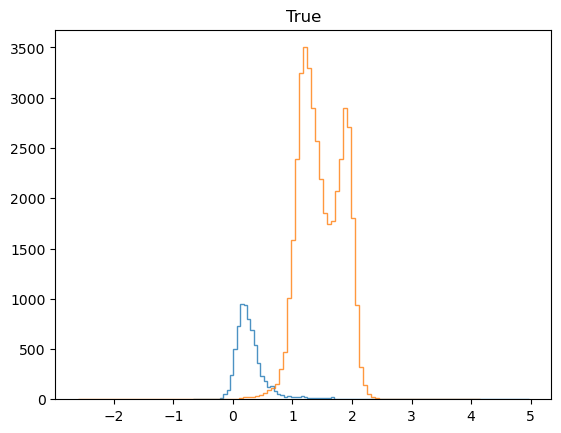

In [18]:
clf= GMMBayes(n_components=5)
clf.fit(X_train[:,0:4],y_train)
y_pred = clf.predict(X[:,0:4]) 

plt.hist(d['ug'][lab=='QSO'],histtype='step', bins=100, alpha=0.8);
plt.hist(d['ug'][lab=='GALAXY'],histtype='step', bins=100, alpha=0.8);
plt.title("True")
plt.show()

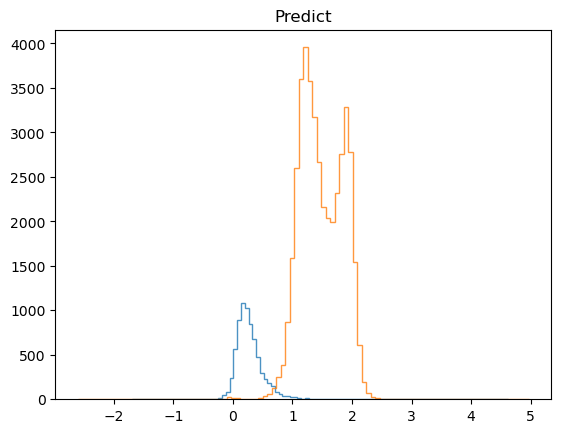

In [19]:
plt.hist(d['ug'][y_pred==1],histtype='step', bins=100, alpha=0.8);
plt.hist(d['ug'][y_pred==0],histtype='step', bins=100, alpha=0.8);
plt.title("Predict")
plt.show()